In [1]:
import numpy as np
import pandas as pd
# from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
data_ori = pd.read_csv("../data/20220921_ori.csv", lineterminator='\n')  
data_rt = pd.read_csv("../data/20220921_rt.csv", lineterminator='\n')  

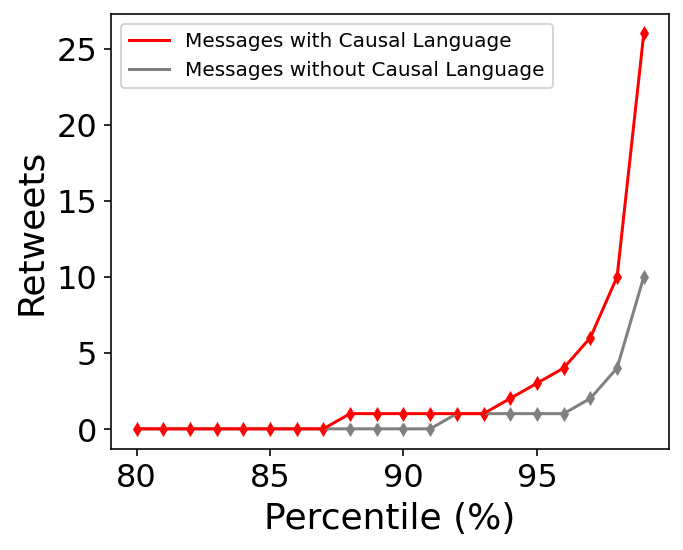

In [3]:
# Fig. 1.

percentiles = np.arange(0, 100, 1)  

distribution_yes_percentiles = np.percentile(data_ori[data_ori['contain_CL'] == 'yes']['retweet_count'], percentiles)
distribution_no_percentiles = np.percentile(data_ori[data_ori['contain_CL'] == 'no']['retweet_count'], percentiles)

percentile_data = pd.DataFrame({'Percentile': percentiles,
                                'Distribution_yes': distribution_yes_percentiles,
                                'Distribution_no': distribution_no_percentiles})


plt.figure(figsize=(5, 4))

line1 = sns.lineplot(x='Percentile', y='Distribution_no', data=percentile_data[80:], label='Messages without Causal Language', color = 'grey')
sns.scatterplot(x='Percentile', y='Distribution_no', data=percentile_data[80:], marker='d', color = 'grey')

line2 = sns.lineplot(x='Percentile', y='Distribution_yes', data=percentile_data[80:], label='Messages with Causal Language', color = 'red')
sns.scatterplot(x='Percentile', y='Distribution_yes', data=percentile_data[80:], marker='d', color = 'red')

plt.xlabel('Percentile (%)', size = 18)
plt.ylabel('Retweets', size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)


axes = plt.gca()
axes.set_xticks([80.0, 85.0, 90.0, 95.0])


handles, labels = axes.get_legend_handles_labels()

order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])



# plt.savefig("../fig/20220921_fig1.pdf", format="pdf", bbox_inches="tight")


plt.show()



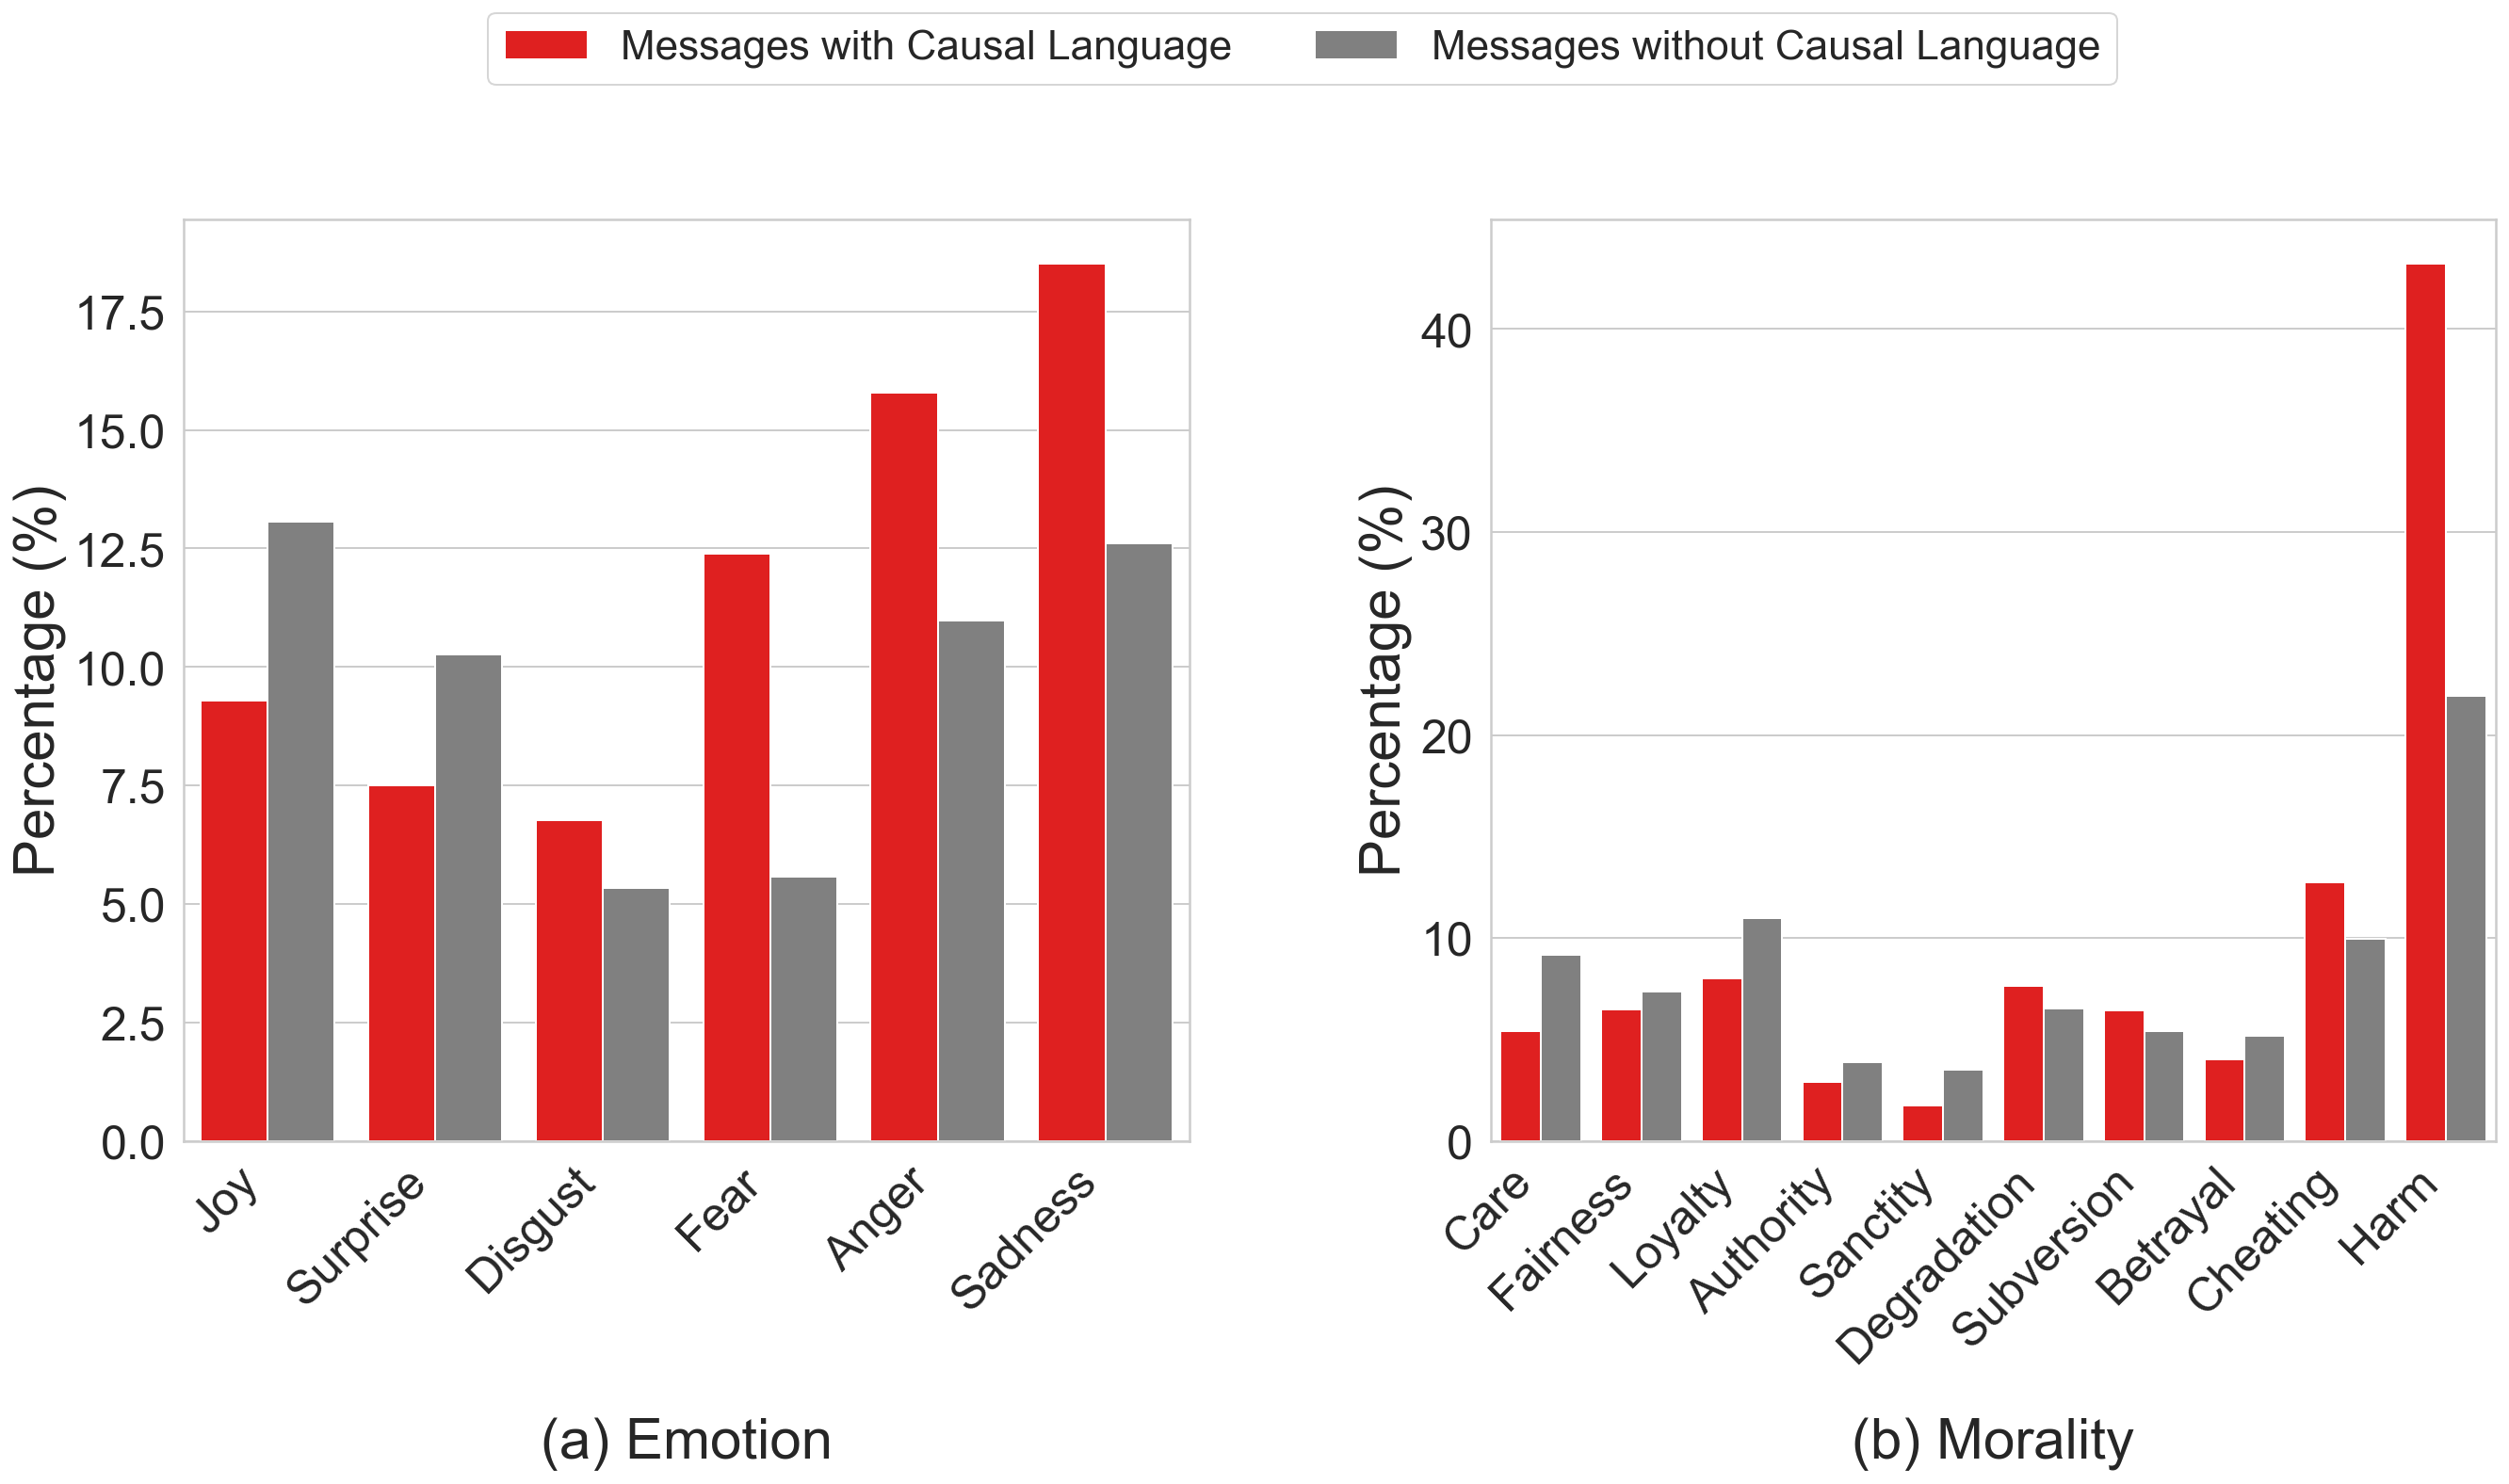

In [6]:
# Fig. 2. 

sns.set_style("whitegrid")
color_palette = {"yes": "red", "no": "grey"}

emotion_order = ['joy', 'surprise', 'disgust', 'fear', 'anger', 'sadness'  ]
MF_order = ['care.virtue', 'fairness.virtue', 'loyalty.virtue', 'authority.virtue', 'sanctity.virtue',  'sanctity.vice',  'authority.vice', 'loyalty.vice', 'fairness.vice', 'care.vice']

fig, ax = plt.subplots(1, 2, figsize=(22,9))
plt.subplots_adjust(wspace=0.3)  

grouped = data_ori.groupby(['contain_CL', 'EMO']).size()
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
percentages.columns = ['contain_CL', 'EMO', 'percentage']
sns.barplot(ax=ax[0], x='EMO', y='percentage', hue='contain_CL', data=percentages, order=emotion_order, hue_order=['yes', 'no'], palette=color_palette)

ax[0].set_xlabel('(a) Emotion', size=30)
ax[0].xaxis.set_label_coords(0.5, -0.3) 
ax[0].set_ylabel('Percentage (%)', size=30)
ax[0].tick_params(axis='both', which='major', labelsize=25)

emotion_labels = ['Joy', 'Surprise', 'Disgust', 'Fear', 'Anger', 'Sadness' ]
ax[0].set_xticklabels(emotion_labels, rotation=45, horizontalalignment='right')
ax[0].get_legend().remove() 

grouped = data_ori.groupby(['contain_CL', 'MF']).size()
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
percentages.columns = ['contain_CL', 'MF', 'percentage']

sns.barplot(ax=ax[1], x='MF', y='percentage', hue='contain_CL', data=percentages, order=MF_order, hue_order=['yes', 'no'], palette=color_palette)

ax[1].set_ylabel('Percentage (%)', size=30)
ax[1].xaxis.set_label_coords(0.5, -0.3) 
ax[1].set_xlabel('(b) Morality', size=30)
ax[1].tick_params(axis='both', which='major', labelsize=25)

MF_order = ['care.virtue', 'fairness.virtue', 'loyalty.virtue', 'authority.virtue', 'sanctity.virtue',  'sanctity.vice',  'authority.vice', 'loyalty.vice', 'fairness.vice', 'care.vice']
MF_labels = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity', 
             'Degradation', 'Subversion', 'Betrayal', 'Cheating', 'Harm']
ax[1].set_xticklabels(MF_labels, rotation=45, horizontalalignment='right')
ax[1].get_legend().remove() 

handles, labels = ax[1].get_legend_handles_labels()
labels = ['Messages with Causal Language', 'Messages without Causal Language']
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize = 22)


# plt.savefig("../fig/20220921_fig2.pdf", format="pdf", bbox_inches="tight")


plt.show()



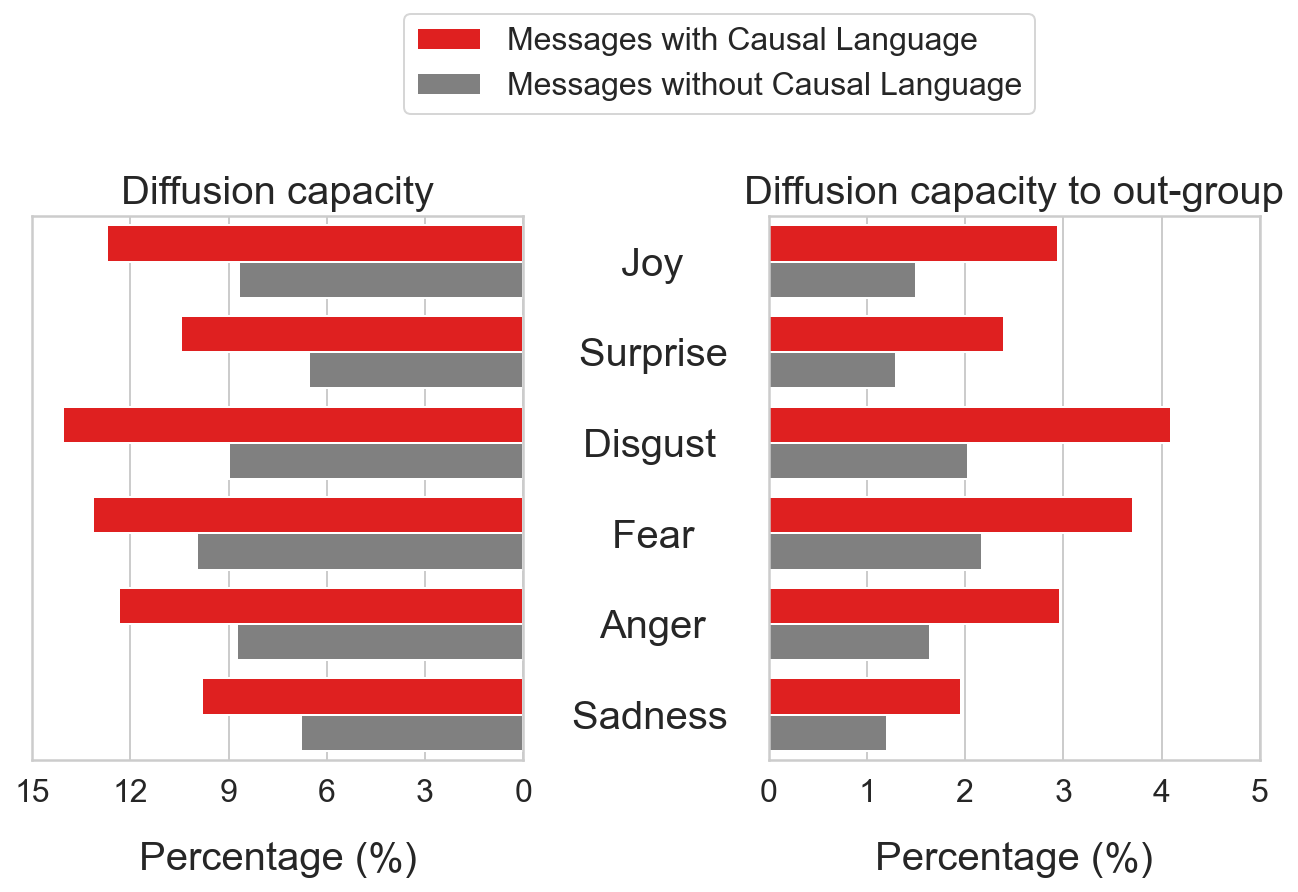

In [5]:
# Fig. 3.
data_all_grouped = data_ori.groupby(['contain_CL', 'EMO']).size().reset_index(name='count')

data_comm_all = data_rt.drop_duplicates(subset='ori_tweet_id', keep='first')
data_comm_all_grouped = data_comm_all.groupby(['contain_CL', 'EMO']).size().reset_index(name='comm_all_count')

data_comm_diff = data_rt[data_rt['community'] == 'diff']
data_comm_diff = data_comm_diff.drop_duplicates(subset='ori_tweet_id', keep='first')
data_comm_diff_grouped = data_comm_diff.groupby(['contain_CL', 'EMO']).size().reset_index(name='comm_diff_count')

data = pd.merge(data_all_grouped, data_comm_all_grouped, on=['contain_CL', 'EMO'])
data = pd.merge(data, data_comm_diff_grouped, on=['contain_CL', 'EMO'])

data['comm_all_percentage'] = data['comm_all_count'] *100 / data['count'] 
data['comm_diff_percentage'] = data['comm_diff_count'] *100 / data['count']

# plot
sns.set_theme(style="whitegrid")
emotion_order = ['joy', 'surprise', 'disgust', 'fear', 'anger', 'sadness'  ]
palette = {"yes": "red", "no": "grey"}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), sharey=False)
plt.subplots_adjust(wspace=0.5) 

df_emo_mirrored = data.copy()
df_emo_mirrored['comm_all_percentage'] = [-i for i in df_emo_mirrored['comm_all_percentage']]
ax1 = sns.barplot(y="EMO", x="comm_all_percentage", hue="contain_CL", hue_order=['yes', 'no'], data=df_emo_mirrored, order=emotion_order, ci=None, palette=palette, ax=ax1)
ax2 = sns.barplot(y="EMO", x="comm_diff_percentage", hue="contain_CL", hue_order=['yes', 'no'], data=data, order=emotion_order, ci=None, palette=palette, ax=ax2)

ax1.set_xticks([-15, -12, -9, -6, -3, 0])
ax1.set_xticklabels([15, 12, 9, 6, 3, 0], size = 16)

ax2.set_xticks([0, 1, 2, 3, 4, 5]) 
ax2.set_xticklabels([0, 1, 2, 3, 4, 5], size = 16 ) 

ax1.set_title('Diffusion capacity', size = 20)
ax2.set_title('Diffusion capacity to out-group', size = 20)

plt.xticks(size = 16)
plt.yticks(size = 16)

emotion_labels = ['Joy      ', 'Surprise  ', 'Disgust   ', 'Fear     ', 'Anger    ', 'Sadness  ' ]
ax2.set_yticklabels(emotion_labels, horizontalalignment='right', size = 20)

ax2.get_legend().remove()
handles, labels = ax2.get_legend_handles_labels()
labels = ['Messages with Causal Language', 'Messages without Causal Language']
ax1.legend(handles, labels, loc='center', bbox_to_anchor=(1.4, 1.28), ncol=1, fontsize = 16)

ax1.set_ylabel('', size=20)
ax2.set_ylabel('', size=20)
ax1.set_yticklabels('')

ax1.set_xlabel('Percentage (%)', size=20)
ax2.set_xlabel('Percentage (%)', size=20)
ax1.xaxis.set_label_coords(0.5, -0.15) 
ax2.xaxis.set_label_coords(0.5, -0.15)


# plt.savefig("../fig/20220921_fig3.pdf", format="pdf", bbox_inches="tight")


plt.show()

